# **Google PlayStore Analysis**
### Author: Meer Muhammad
### Email: 2020n02900@gmail.com


---

## **Table of Contents:**
1. [About Dataset](#about-dataset)
2. [Import Libraries](#1-import-libraries)
3. [Data Loading and Exploration](#2-data-loading-and-exploration-and-cleaning)
4. [Descriptive Statistics](#21-descrptive-statistics)
5. [Dealing with Missing values](#22-dealing-with-missing-values)
6. [Handling missing values](#23-handling-the-missing-values)
7. [Duplicates](#23-duplicates)
8. [Insights from data](#3-insights-from-the-data)
9. [Category](#category)
   1.  [category and apps](#31-which-category-has-the-highest-number-of-apps)
   2.  [categry and installation](#32-which-category-has-the-highest-number-of-installs) 
   3.  [categry and reviews](#33-which-category-has-the-highest-number-of-reviews)  
   4.  [categry and ratings](#34-which-category-has-the-highest-rating) 
   5.  [categry and size](#36-which-category-has-largest-size)
10. [Price](#price)
    1.  [categry and price](#36-which-categories-have-the-highest-average-price)
    2.  [Installs (free vs paid)](#37-number-of-installs-free-vs-paid)

11. [Top 5 APPS](#top-5-apps)
    1.  [Top 5 paid apps](#38-top-5-rated-paid-apps)
    2.  [Top 5 free apps](#39-top-5-rated-free-apps)
    3.  [highest reviewed(free)](#3100-top-5-free-apps-with-highest-reviews)
    4.  [highest reviewed(paid)](#3101-top-5-highest-reviewed-paid-apps)
12. [Genre](#genres)
    1.  [Genre with Highest apps](#3103-which-genre-has-highest-number-of-apps)
    2.  [Genre with Highest Installs](#3104-genre-with-greatest-installs)
    3.  [genre with average rating](#3105-genre-with-average-ratings)
13. [Conclusion](#3106-conclusion)
---

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

---

# 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [3]:
data=pd.read_csv('googleplaystore.csv')

- lets have a look on top 5 rows of the data

In [40]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands: 

In [41]:
# set options to maximum
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# hide all warnings
import warnings
warnings.filterwarnings("ignore")

* lets see the exact columns names which can be easily copied late on from Google Playstore Dataset

In [42]:
print(f" The names of columns in this dataset are:{data.columns}")

 The names of columns in this dataset are:Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [43]:
print(f" The numbers of rows are :{data.shape[0]}")
print(f" The numbers of columns are :{data.shape[1]}")


 The numbers of rows are :10841
 The numbers of columns are :13


* Detailed Info about the columns

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# **Observations**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'` 

In [45]:
data.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observations:
---
- we have only 2 coluumns as numerical data type, remaining are all object data ( according to python), but we can observe that `'Size','install','Price'` are also numeric, we must convert them to numeric data in **data wrangling** process
---

* Lets clean the `Size` column first

In [46]:
data['Size'].isnull().sum()


0

* No null values , we are good to go further

In [47]:
# making Size column  numeric
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

## Observations:
* There are several uniques values in the `Size` column, we have to first make the unit inot one common unit from M and K to bytes and then removing the `M` and `K` from the values and convert them into numeric data type.

In [48]:
#  find the values having M in them
data["Size"].loc[data["Size"].str.contains('M')].value_counts().sum()

8830

In [49]:
# find the values having K in them
data["Size"].loc[data["Size"].str.contains('k')].value_counts().sum()

316

In [50]:
# find the values having 'Varies with devices'
data["Size"].loc[data["Size"].str.contains('Varies with device')].value_counts().sum()

1695

In [51]:
# total values in Size column
data['Size'].value_counts().sum()

10841

In [52]:
# taking sum of all values in the size column which has 'M' , 'K'  and ;Varies with device
8830+316+1695

10841

* We have `8830` values in `M` units
* We have `316` values in `K unnits`
* we have `1695` values in `Varies with device`
  
  >Lets convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type


In [4]:
# convert the whole size columns into bytes
# lets define the function

def convert_size(size):
    '''    
    This function will convert the size column into numericby multiplying the values with 1024 if it has 'K' in it and 1024*1024 if it has 'M' in it
    '''

    if isinstance(size,str):
        if 'k' in size:
            return float(size.replace('k',''))*1024
        elif 'M' in size:
            return float(size.replace('M',''))*1024*1024
        elif 'Varies with device' in size:
            return np.nan
        
    return size

In [5]:
# lets apply this function
data['Size']= data['Size'].apply(convert_size)

In [6]:
# rename the column name 'Size' to Size(Bytes)
data.rename(columns={'Size': "Size(bytes)"},inplace=True)

In [8]:
data.head()

,App,Category,Rating,Reviews,Size(bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# making a new column called 'Size(Mbs) which contains size in mbs
data['Size(Mbs)']=data['Size(bytes)'].apply(lambda x:x/(1024*1024))

* Now we have converted evry value into bytes and removed the `'M' and 'K'`from the values and converted them into numeric data types
* `Varies with devices` was string value , therefore we intentionally converted them inot null values , which we can fill later according to our needs
---

* ### lets have a look on the `Installs` columns

In [58]:
# check the unique values in the Installs columns
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [59]:
data['Installs'].value_counts()


Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [60]:
# lets find  how many values has '+' in it
data['Installs'].loc[data['Installs'].str.contains('\+')].value_counts().sum()

10840

In [61]:
data['Installs'].value_counts().sum()

10841

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.
  

- The total values in the `Installs` column are `10841` and there are no null values in the column.
- However, one value 0 has no plus sign

- Let's remove the plus sign `+` and `,` from the values and convert them into numeric data type

In [8]:
# removing + sign
data['Installs']=data['Installs'].apply(lambda x: x.replace('+',"") if '+' in str(x) else x )
# reomoving commas in 'Install' columns
data['Installs']=data['Installs'].apply(lambda x: x.replace(',',"") if ',' in str(x) else x )
# converting installs column to numeric
data['Installs'] = pd.to_numeric(data['Installs'])


In [9]:
data['Installs'].value_counts()


Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

- `+` and `,` sign are removed from `Installs` columns
- data type of column is also changed 

In [64]:
data['Installs'].dtype

dtype('int64')

In [65]:
data.describe()

,Rating,Reviews,Size(bytes),Installs,Size(Mbs)
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


In [10]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
data['Installs_category'] = pd.cut(data['Installs'], bins=bins, labels=labels)

In [11]:
# checking the values count of new coloumn
data['Installs_category'].value_counts()

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

* ### lets have a look on the `Price` columns

In [68]:
#checkig the unique values in Price column
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [69]:
# checking null values
data['Price'].isnull().sum()

0

* No Null values in `Price` columns
* we are good to go

In [70]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

* fisrt check whether the values contains `$` or not 

In [12]:
# lets see how many values have $ sign
data['Price'].loc[data["Price"].str.contains('\$')].value_counts().sum()

800

In [13]:
# This code counts the number of values in the 'PRICE' columns which contains 0 but doesn't contain $ sign
data['Price'].loc[(data['Price'].str.contains('0')) & (~data['Price'].str.contains('\$'))].value_counts().sum()

10041

*  Now we have confirmed that only currency used is `$` in `Price` column or `0` value
*  `800+10041=10841  Total values`
*  we are just to remove `$` sign and make the column a numerical one

In [14]:
# removinf $ sign from the Price column 
data['Price']=data['Price'].apply(lambda x: x.replace('$',"") if '$' in str(x) else x )
# now we can convert into a numerical 
data['Price']=data["Price"].apply(lambda x: float(x))

In [74]:
data['Price'].value_counts()

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [15]:
# using f print min max and average prices of the app
print(f"Min price is { data['Price'].min()}")
print(f"Max price is { data['Price'].max()}")
print(f"Average price is { data['Price'].mean()}")


Min price is 0.0
Max price is 400.0
Average price is 1.0272733142699015


In [16]:
data.describe()

,Rating,Reviews,Size(bytes),Installs,Price,Size(Mbs)
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


### **2.1. Descrptive Statistics**

In [76]:
data.describe()

,Rating,Reviews,Size(bytes),Installs,Price,Size(Mbs)
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


## Observations:
---
- numerical columns are: `6`
- minimal value of `Rating` = `1` and maximum is `5` and `average=19`
- minimal value of `Reviews` = `0` and maximum is `78,158,306` and `average=444,111.93`
  

---
The most important thing is to classify app based on the `Correlation Matrix` and  then observe the discrptive statistics of the app category and number of installs , reviews and ratings

wait! What about `Missing Values`?

Lets dive into it

---

## **2.2. Dealing with `Missing Values`**

> Dealing with missing values is one of the most important part of the data wrangling process to get correct insight of the data


* Lets have a look on the missing values in the dataset

In [18]:
# finding the missing values in  the data in descending order

null_sum=data.isnull().sum().sort_values(ascending=False)
null_sum

Size(bytes)          1695
Size(Mbs)            1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [19]:
# total numbers of null values in the entire dataset
data.isnull().sum().sum()

4877

In [20]:
# finding the missing values percentage in the data
null_sum/len(data)*100
# rounding upto 2 decimal places
round(null_sum/len(data)*100,2).sort_values(ascending=False)


Size(bytes)          15.64
Size(Mbs)            15.64
Rating               13.60
Current Ver           0.07
Android Ver           0.02
Category              0.01
Type                  0.01
Genres                0.01
App                   0.00
Reviews               0.00
Installs              0.00
Price                 0.00
Content Rating        0.00
Last Updated          0.00
Installs_category     0.00
dtype: float64

* To get visulize null values, Pot it

<Axes: >

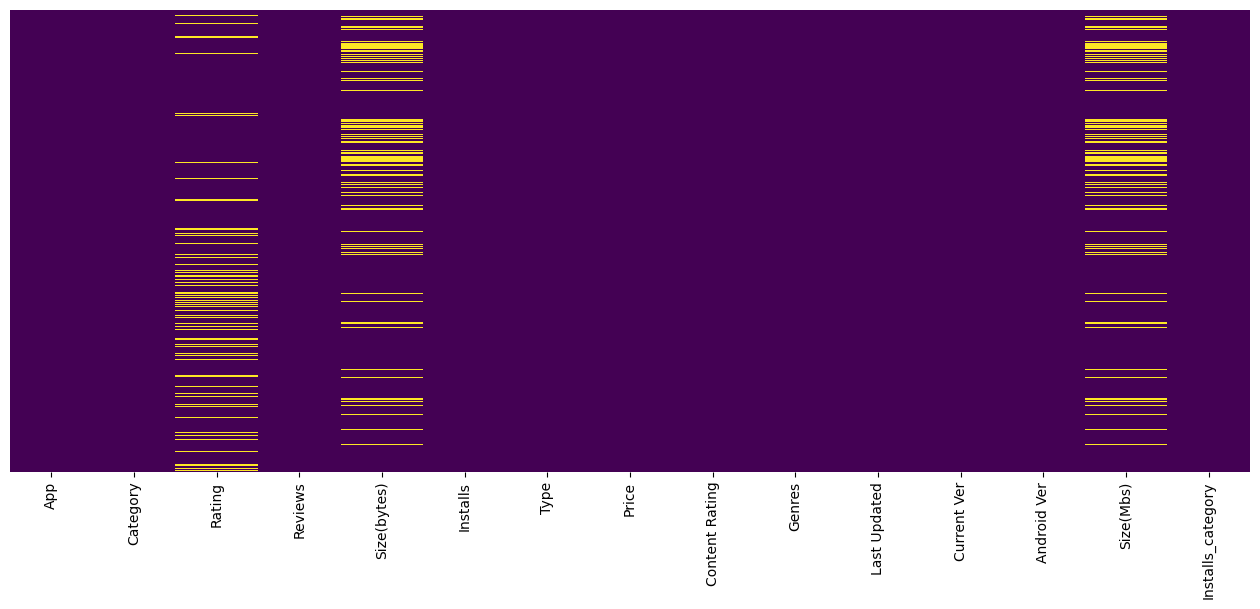

In [19]:
# plot  missing values
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5, 1.0, 'Percentage missing values in each columns')

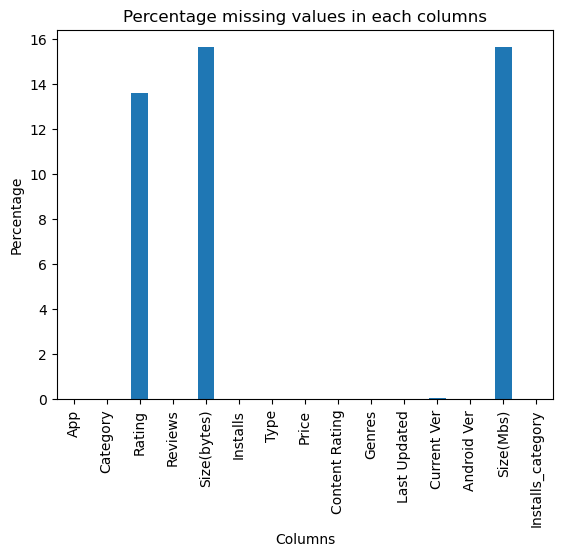

In [21]:
# ploting missing  values on the bases of %age
missing_percentage= data.isnull().sum()/len(data)*100
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel("Percentage")
plt.title("Percentage missing values in each columns")

*  we see that there are values less than 2%

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

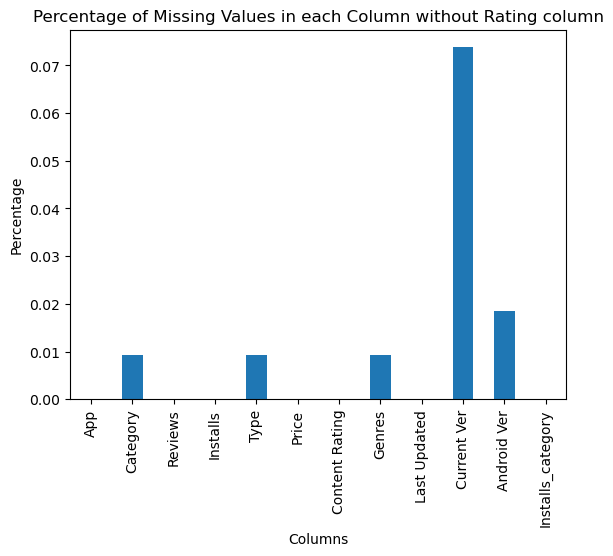

In [81]:
# missing values less than 1%
missing_percentage[missing_percentage<1].plot(kind='bar')
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column') 

In [82]:
# The percentage of null values in each column
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

Size(bytes)          15.635089
Size(Mbs)            15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
App                   0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

### **2.3. Handling  the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

In [83]:
data.describe()

,Rating,Reviews,Size(bytes),Installs,Price,Size(Mbs)
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


*  pearson correlation matrix

<Axes: >

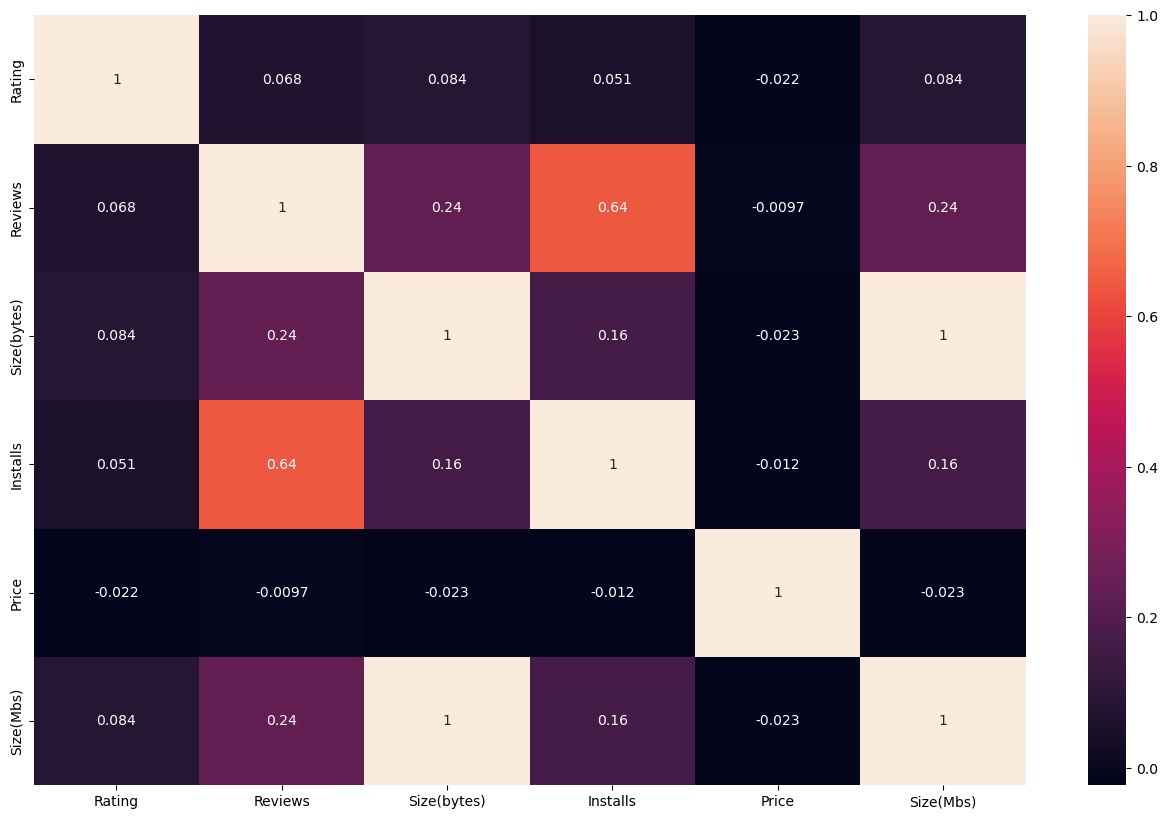

In [22]:
# maing correlation matrix
plt.figure(figsize=(16,10))
num_columns=['Rating','Reviews','Size(bytes)','Installs','Price','Size(Mbs)']
# correlation matrix
corr_mat=data[num_columns].corr()
# plot the matrix 
sns.heatmap(corr_mat,annot=True)

In [23]:
# we can also calculate correlation matrix using pandas
data[num_columns].corr()

,Rating,Reviews,Size(bytes),Installs,Price,Size(Mbs)
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size(bytes),0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size(Mbs),0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


  **calculating pearson correlation coefficient**
  - install `scipy` in your editor
  - import `scipy`
  - remove rows containg null values
  

In [2]:
pip install scipy

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached scipy-1.11.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.1 MB 744.7 kB/s eta 0:01:00
   ---------------------------------------- 0.1/44.1 MB 819.2 kB/s eta 0:00:54
   ---------------------------------------- 0.2/44.1 MB 908.0 kB/s eta 0:00:49
   ---------------------------------------- 0.2/44.1 MB 838.1 kB/s eta 0:00:53
   ---------------------------------------- 0.4/44.1 MB 1.1 MB/s eta 0:00:42
   ---------------------------------------- 0.4/44.1 MB 983.0 kB/s eta 0:00:45
    --------------------------------------- 0.6/44.1 MB 1.3 MB/s eta 0:00:35
    --------------------------------------- 0.7/44.1 MB 1.4 MB/s eta 0:00:32
   - -------------------------------------- 1.2/44.1 MB 2.0 MB/s eta 0:00:22
   - -------------------------------------- 1.5/44.1 MB 2.4 MB/s eta 0:00:18
   - ----

In [24]:
from scipy import stats
clean_data=data.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(clean_data['Reviews'],clean_data['Installs'])
print(f"Pearson'R between Reviews and Installs :{pearson_r:.4f}")

Pearson'R between Reviews and Installs :0.6262


---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an ap with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [25]:
# length before removing the null values
print(f" length of data frame before removing null values:{len(data)}")

 length of data frame before removing null values:10841


In [26]:
# removing the null values in the dataset other than Rating, size in bytes and mbs columns
data.dropna(subset=['Current Ver','Android Ver','Category','Type','Genres'],inplace=True)

In [27]:
# length after removing the null values
print(f" length after null values: {len(data)}")

 length after null values: 10829


* We have removed `12` rows having null values

In [28]:
# checking the null values again
data.isnull().sum().sort_values(ascending=False)

Size(bytes)          1694
Size(Mbs)            1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
  ## Observations:
  - Only `Rating` and `Size(bytes)` or `Size(MBs)` columns are left with null values
  
    - `Rating` is linked with `Installs` , so we carefully handle this
     - `Size` column are left with null because app can be of different size and we cant predict as nearly as possible
---

In [29]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(bytes)', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size(Mbs)', 'Installs_category'],
      dtype='object')

In [31]:
# finding the trend of rating in each install category
data.groupby('Installs_category')['Rating'].describe()

C:\Users\ALI PC\AppData\Local\Temp\ipykernel_1076\4390239.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Installs_category')['Rating'].describe()


,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [39]:
data['Installs_category'].loc[data['Rating'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- different category hav null values
- so we will impute the them will their mean values

In [32]:
category_mean=data.groupby('Installs_category')['Rating'].mean()
data['Rating'] = data.apply(lambda row: category_mean[row['Installs_category']] 
                            if pd.isnull(row['Rating']) else row['Rating'], axis=1)

C:\Users\ALI PC\AppData\Local\Temp\ipykernel_1076\3926371614.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_mean=data.groupby('Installs_category')['Rating'].mean()


In [33]:
data['Rating'].isnull().sum()

14

In [34]:
data['Installs_category'].loc[data['Rating'].isnull()].value_counts()

Installs_category
no                    14
Very low               0
Low                    0
Moderate               0
More than moderate     0
High                   0
Very High              0
Top Notch              0
Name: count, dtype: int64

- missing values are still there in `NO` category
    - as `NO` category has no values so will impute tehm with 0

In [40]:
data['Rating'].fillna(0,inplace=True)

In [41]:
data['Installs_category'].loc[data['Rating'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

In [38]:
data.groupby('Installs_category')['Rating'].describe()

C:\Users\ALI PC\AppData\Local\Temp\ipykernel_1076\3549803534.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Installs_category')['Rating'].describe()


,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,14.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Very low,534.0,4.637037,0.327446,1.0,4.637037,4.637037,4.637037,5.0
Low,2158.0,4.170970,0.635247,1.0,4.170970,4.170970,4.500000,5.0
Moderate,1528.0,4.035417,0.586753,1.4,3.800000,4.100000,4.500000,5.0
More than moderate,1647.0,4.093255,0.500836,1.6,3.900000,4.200000,4.400000,4.9
High,2116.0,4.207525,0.376327,1.8,4.000000,4.300000,4.500000,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.100000,4.300000,4.500000,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.300000,4.400000,4.500000,4.8


- Let's check if there is any similar link with Reviews as well
  

In [42]:
#  in which Install_category the Rating has NaN values
data['Installs_category'].loc[data['Rating'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- There are Null values in Reviews

d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Installs_category', ylabel='Reviews'>

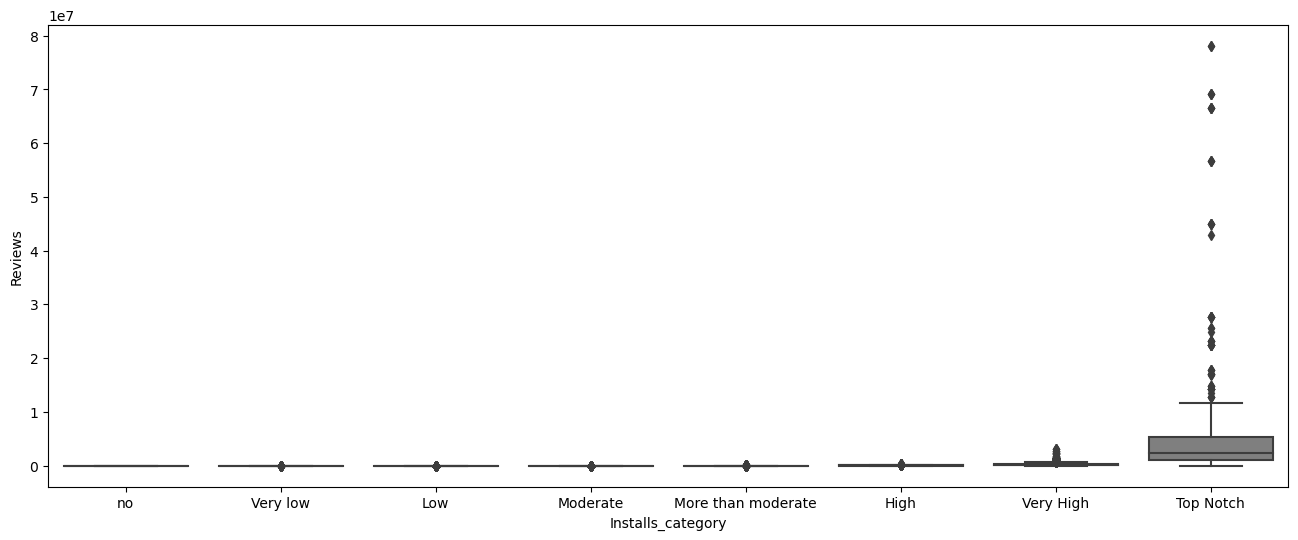

In [43]:
# lets plot the same plots for Reviews column as well
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category',y='Reviews',data=data)


- the plot looks imbalance due greater values of reviews so we plot logrithmic functions of reviews

d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
d:\downoads\miniconda\envs

<Axes: xlabel='Installs_category', ylabel='Reviews'>

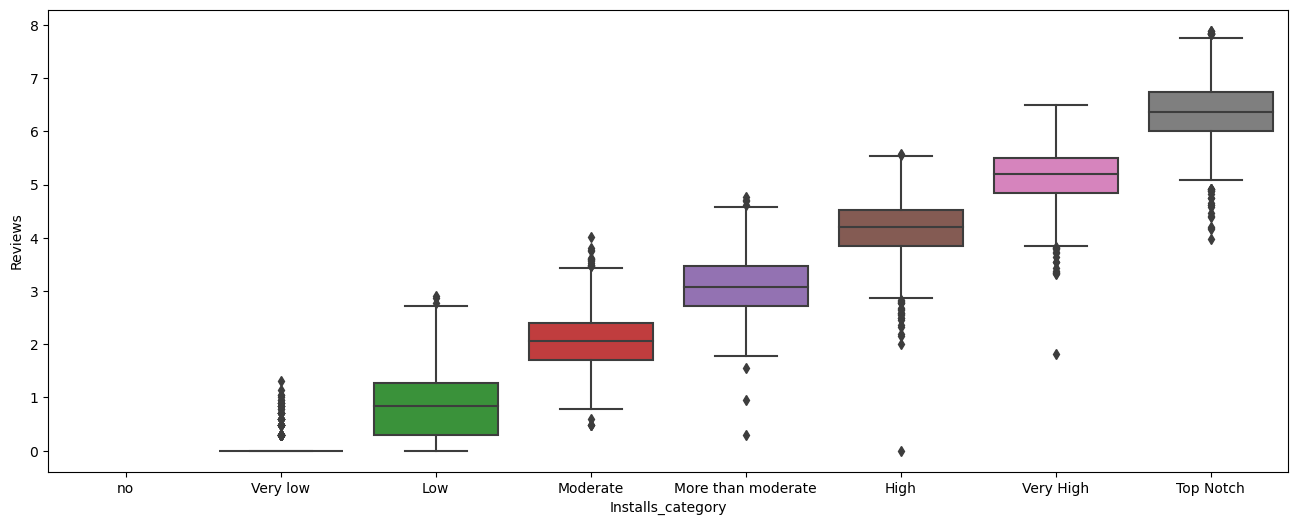

In [44]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category', y= np.log10(data['Reviews']), data=data) # plot the boxplot

- we check `Rating` and `Reviews` on the bases of `Install` columns

d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Rating', ylabel='Reviews'>

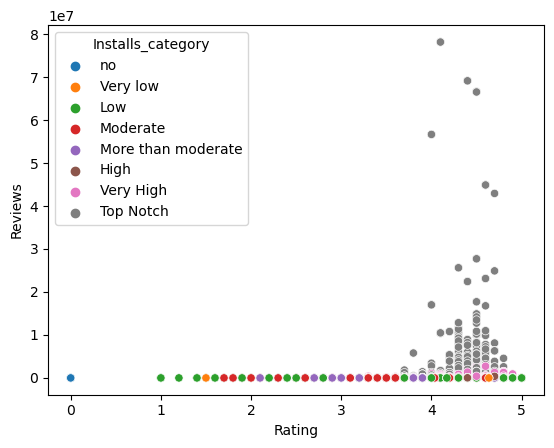

In [46]:
# draw a scatter plot between Rating, Reviews and Installs
sns.scatterplot(x='Rating',y='Reviews',hue='Installs_category',data=data)

- It doesn't show any trends because `ratings` are ordinal values and `Reviews` are continuous variable
- we can not plot them together

d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Reviews', ylabel='Installs'>

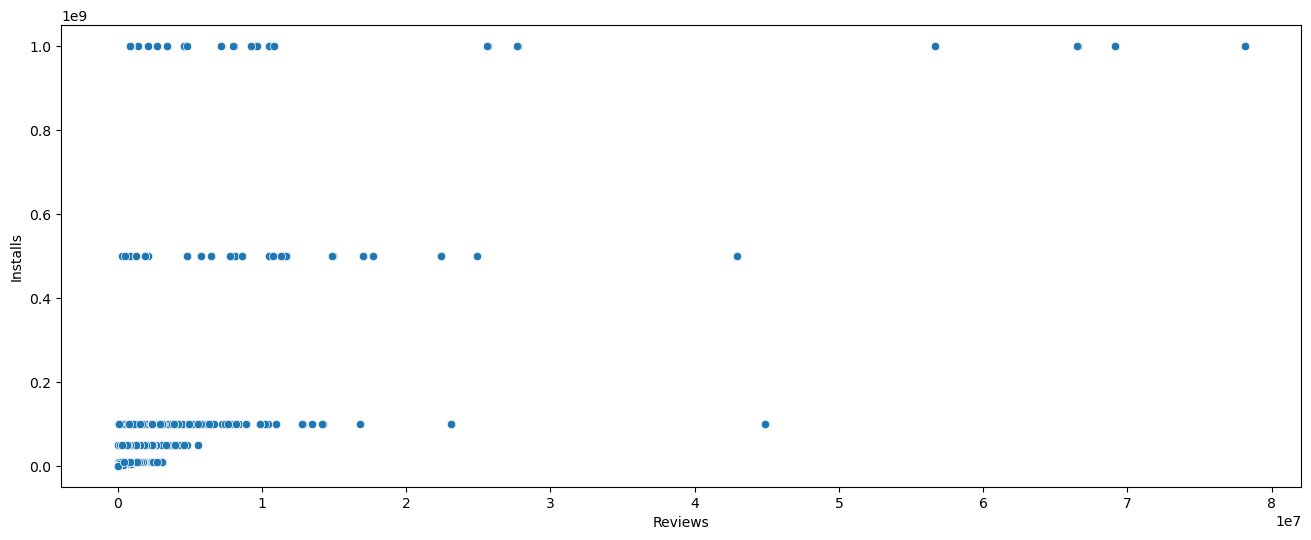

In [47]:
# plot reviews and installs in scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot(x='Reviews',y='Installs',data=data)


d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Reviews', ylabel='Installs'>

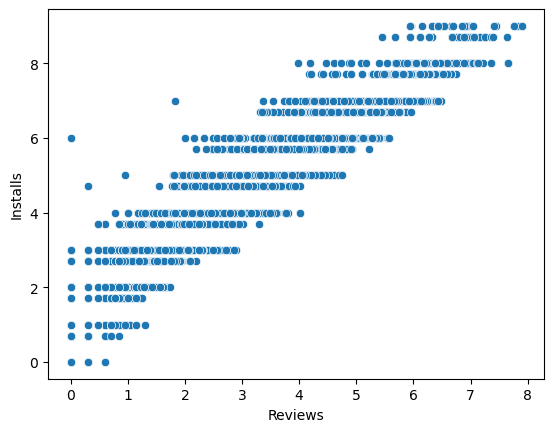

In [48]:
# due to greater values of the reviews and installations we take log transform
sns.scatterplot(x=np.log10(data['Reviews']),y=np.log10(data['Installs']),data=data)

- line plot will be great to see the trends

d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

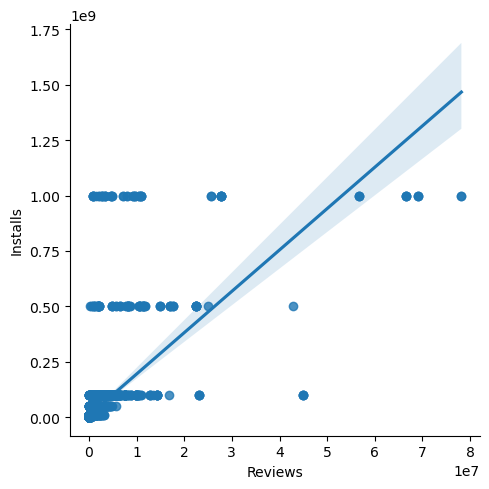

In [49]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Reviews',y='Installs',data=data)

- It shows that if number of reviews increases than numbers of installations increase, which is quite obvious

## Observation
- it makes sense that an APP having less installaton means it has less reviews and less ratings

## **2.3. Duplicates**
- Removing duplicates is one of the most important part of the `data warngling` process, 
-  one should remove duplicates in order to gain correct insights from the data
-  It should be done to gain accuracy and stability of the data
-  it can skew statistical measures

In [51]:
# finding the duplicates in the data set
data.duplicated().sum()

483

  this is the total duplicates in the dataset

  but we can also check based on the app names beacuse every app has unique name

In [52]:
data['App'].duplicated().sum()

1181

In [54]:
# checking duplicates in each columns
for col in data.columns:
    print(f"No. of duplicates in {col} colums: {data[col].duplicated().sum()}")

No. of duplicates in App colums: 1181
No. of duplicates in Category colums: 10796
No. of duplicates in Rating colums: 10784
No. of duplicates in Reviews colums: 4830
No. of duplicates in Size(bytes) colums: 10373
No. of duplicates in Installs colums: 10809
No. of duplicates in Type colums: 10827
No. of duplicates in Price colums: 10737
No. of duplicates in Content Rating colums: 10823
No. of duplicates in Genres colums: 10710
No. of duplicates in Last Updated colums: 9453
No. of duplicates in Current Ver colums: 8046
No. of duplicates in Android Ver colums: 10796
No. of duplicates in Size(Mbs) colums: 10373
No. of duplicates in Installs_category colums: 10821


In [56]:
# In the whole data we have  duplicates
print(f" No. of duplicates in the data: {data.duplicated().sum()}")

 No. of duplicates in the data: 483


In [57]:
# find the exact duplicates in the data
data[data['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size(bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Mbs),Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.8,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,Top Notch
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,Top Notch
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,Top Notch
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,39845888.0,10000000,Free,0.00,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device,38.0,Very High


- there are many apps that are duplicated
- so we need to remove them from dataset
  

> Remove duplicates

In [58]:
data.drop_duplicates(inplace=True)

- We have removed duplicates from the datasete
---

## **3. Insights from the data**

# **Category**

---
## **3.1. Which category has the heighset number of apps?**

In [59]:
# which category has the heighset number of the apps in the data?
data['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

> `Family` category has the highest number of apps

---


## **3.2.Which category has the highest numbers of installations?**

In [63]:
data.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

> Gaming apps are highly installed

---


## **3.3.Which category has the highest numbers of the reviews?**


In [64]:
data.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

> Gaming apps have highest numbers of reviews

---


## **3.4. Which category has the highest rating?**

In [152]:
# which category has the highest numbers of ratings
data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.394346
EDUCATION              4.373794
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.322099
ART_AND_DESIGN         4.298885
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
PARENTING              4.259759
SHOPPING               4.253376
SPORTS                 4.253041
Name: Rating, dtype: float64

C:\Users\ALI PC\AppData\Local\Temp\ipykernel_1076\4071289609.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Rating'],color="blue",shade=True)
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Density'>

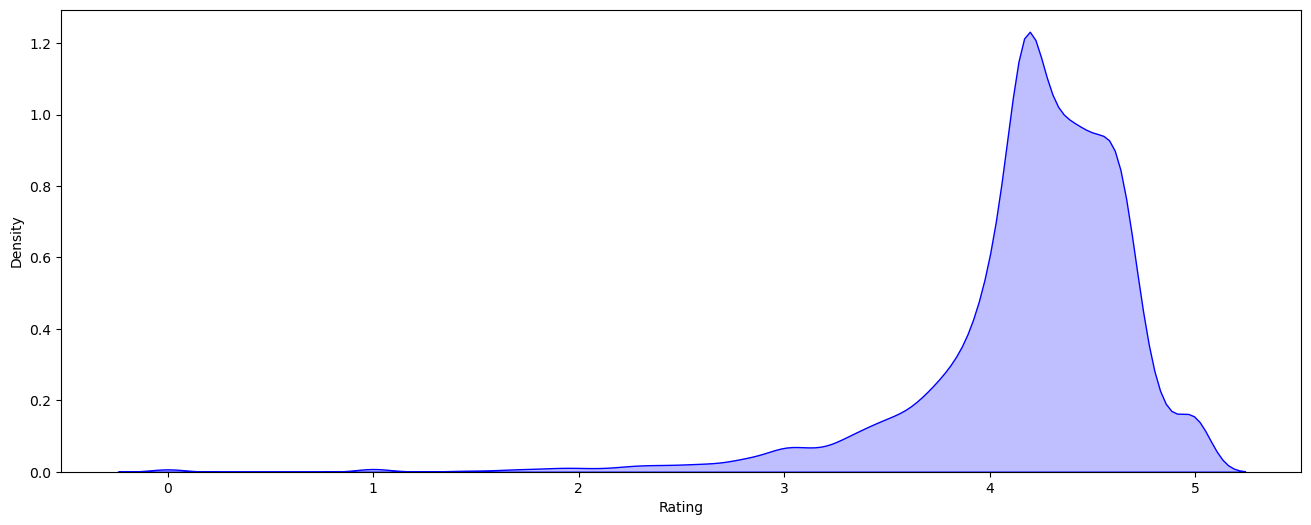

In [67]:
# plot the rating distribution
plt.figure(figsize=(16,6))
sns.kdeplot(data['Rating'],color="blue",shade=True)

## **Content Rating**

## **3.5. What is the distribution of app content ratings?**


d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Content Rating', ylabel='count'>

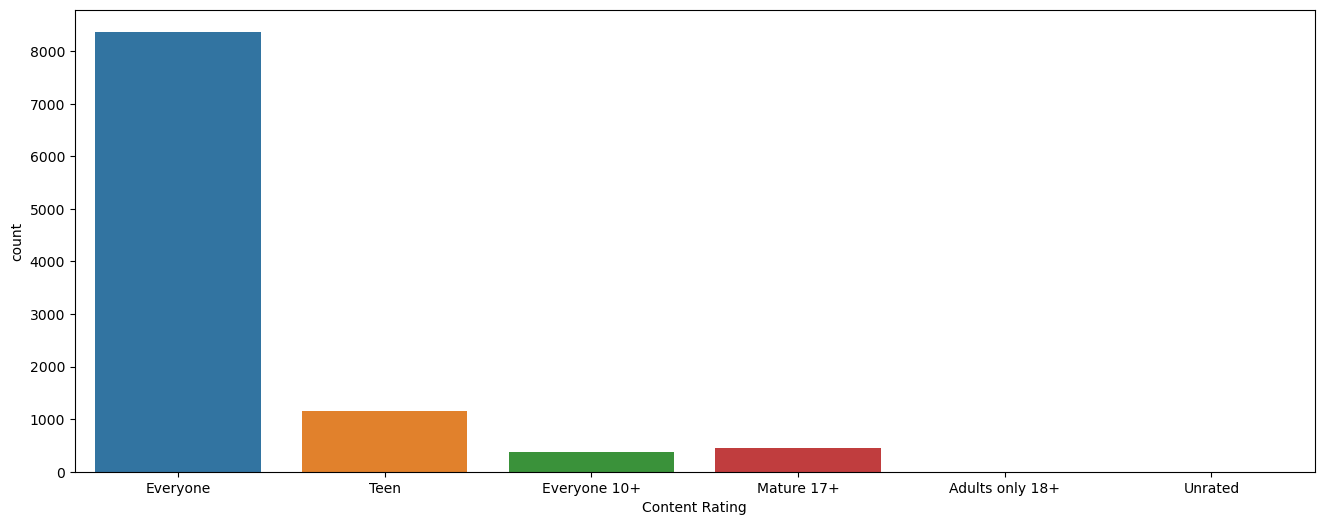

In [76]:
plt.figure(figsize=(16,6))
# what is the distribution of content ratings?
sns.countplot(x=data['Content Rating'],data=data)

- apps for `Everyone` are most popular

d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Content Rating', ylabel='Installs'>

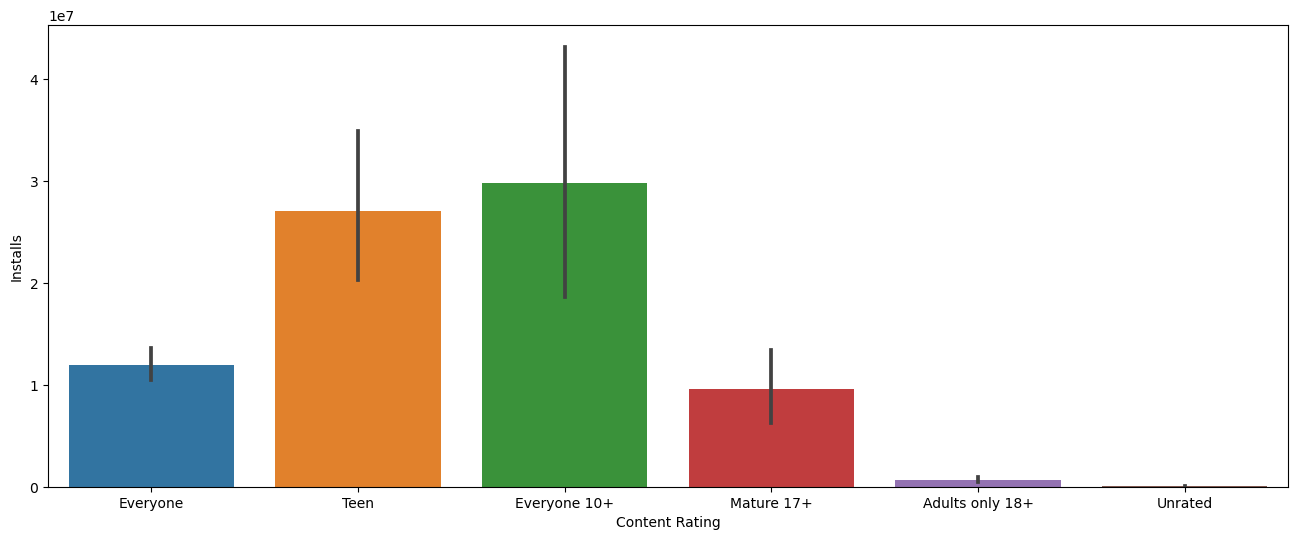

In [96]:
plt.figure(figsize=(16,6))
sns.barplot(x='Content Rating',y='Installs',data=data)

In [97]:
# finding the total counts in rating = everyone
data['Category'].loc[data['Content Rating']=='Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

- `Family` category have the greatest number of apps that can be used by everyone

---

## **Price**

## **3.6. Which categories have the highest average price?**


In [78]:
data.groupby('Category')['Price'].mean().sort_values(ascending=False).head(10)

Category
FINANCE                8.057861
LIFESTYLE              6.329410
MEDICAL                2.501691
EVENTS                 1.718594
FAMILY                 1.247978
PRODUCTIVITY           0.616536
BOOKS_AND_REFERENCE    0.523013
BUSINESS               0.410515
WEATHER                0.395366
PERSONALIZATION        0.388549
Name: Price, dtype: float64

d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

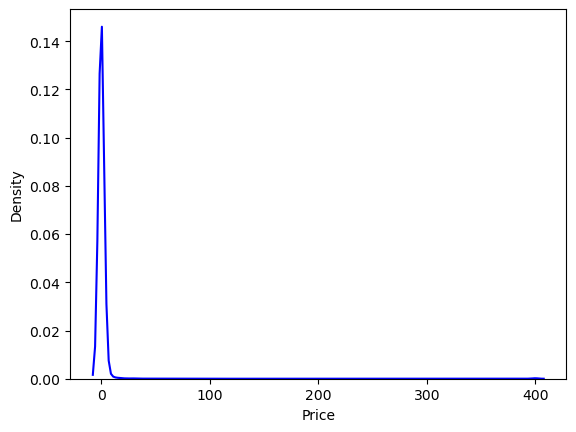

In [81]:
sns.kdeplot(data['Price'],color='blue')

## **3.7. Number of installs: Free vs paid**

In [83]:
data.groupby('Installs')['Type'].value_counts().sort_values(ascending=False).head(10)

Installs  Type
1000000   Free    1466
10000000  Free    1129
100000    Free    1044
10000     Free     913
1000      Free     750
5000000   Free     683
100       Free     615
500000    Free     504
50000     Free     433
5000      Free     403
Name: count, dtype: int64

d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Type', ylabel='Installs'>

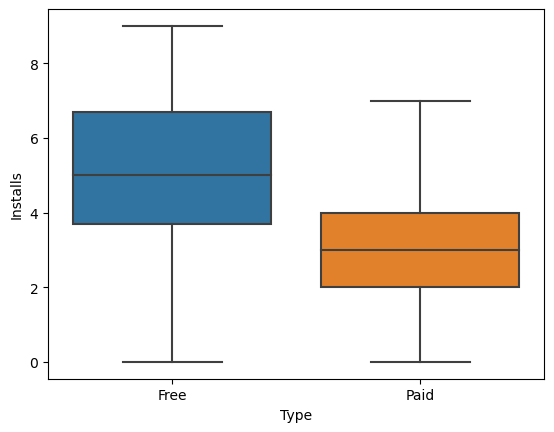

In [87]:
sns.boxplot(data=data,x='Type',y=np.log10(data['Installs']))

- free apps has great number of installation: which is obvious

---

# **Top 5 APPS**
---

### **3.8. Top 5 rated paid apps**


In [106]:
data[data['Type']=='Paid'].sort_values(by='Rating',ascending=False).head(5)

,App,Category,Rating,Reviews,Size(bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Mbs),Installs_category
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,38.0,Very low
9056,Santa's Monster Shootout DX,GAME,5.0,4,34603008.0,50,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up,33.0,Low
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,28311552.0,100,Paid,4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up,27.0,Low
7100,CA Speakers,LIFESTYLE,5.0,12,1258291.2,100,Paid,0.99,Teen,Lifestyle,"March 25, 2014",1,3.0 and up,1.2,Low
8287,AC DC Power Monitor,LIFESTYLE,5.0,1,1258291.2,10,Paid,3.04,Everyone,Lifestyle,"May 29, 2016",1.2,2.3 and up,1.2,Very low


d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='App', ylabel='Rating'>

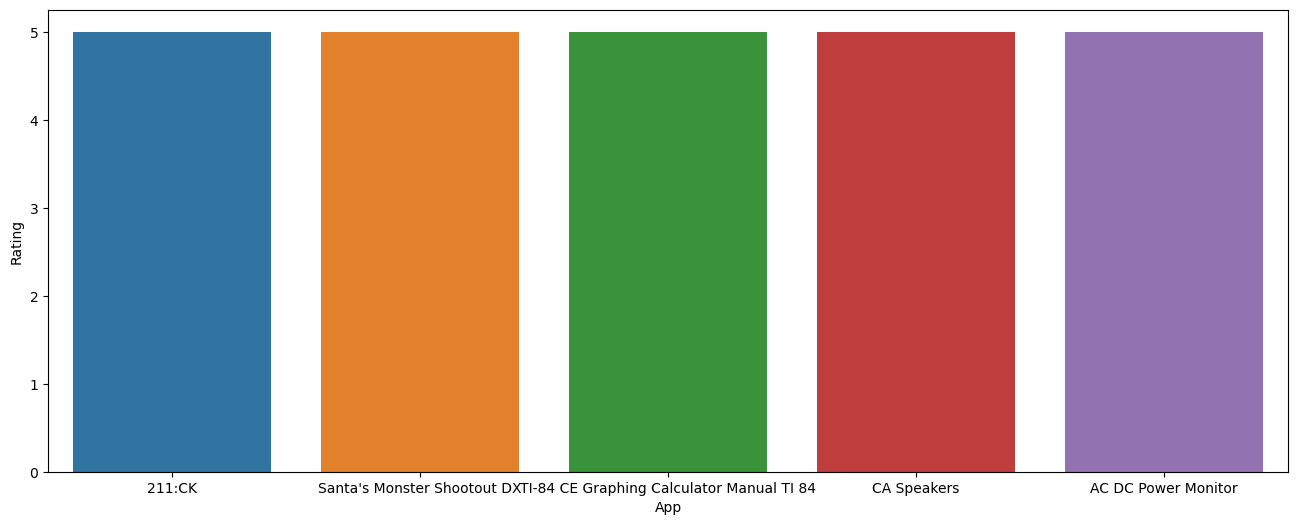

In [105]:
plt.figure(figsize=(16,6))
sns.barplot(x='App',y='Rating',data=data[data['Type']=='Paid'].sort_values(by='Rating',ascending=False).head(5))

### **3.9. Top 5 rated Free apps**

In [107]:
data[data['Type']=='Free'].sort_values(by='Rating',ascending=False).head(5)

,App,Category,Rating,Reviews,Size(bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Mbs),Installs_category
9815,ES Solar,BUSINESS,5.0,3,4928307.2,100,Free,0.0,Everyone,Business,"May 17, 2018",1.2,4.1 and up,4.7,Low
5230,AJ Cam,PHOTOGRAPHY,5.0,44,2936012.8,100,Free,0.0,Everyone,Photography,"January 23, 2018",1,4.1 and up,2.8,Low
7131,C B Patel Health Club,HEALTH_AND_FITNESS,5.0,5,14680064.0,100,Free,0.0,Everyone,Health & Fitness,"July 2, 2018",1.0.1,4.4 and up,14.0,Low
5685,Jobs in Canada - Emplois au Canada,BUSINESS,5.0,2,14680064.0,1000,Free,0.0,Teen,Business,"August 5, 2018",1.1,4.2 and up,14.0,Low
9444,"Kolkata News:Anandbazar Patrika,ei samay&AllRa...",NEWS_AND_MAGAZINES,5.0,10,5242880.0,100,Free,0.0,Everyone,News & Magazines,"July 14, 2018",1,4.0.3 and up,5.0,Low


d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='App', ylabel='Rating'>

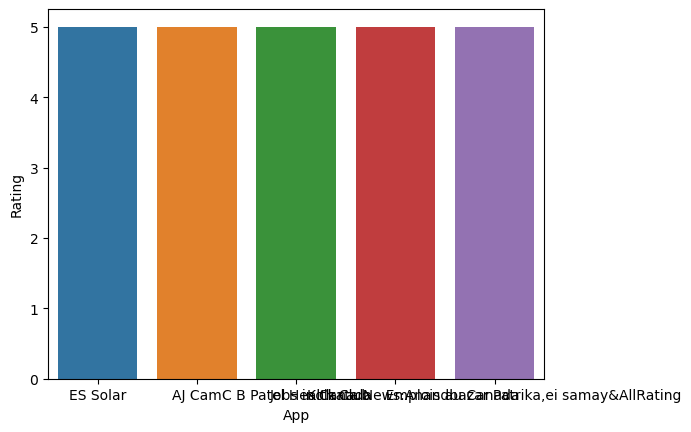

In [109]:
sns.barplot(x='App',y='Rating',data=data[data['Type']=='Free'].sort_values(by='Rating',ascending=False).head(5))

### **3.10.0 Top 5 free apps with highest reviews**

In [111]:
data[data['Type']=='Free'].sort_values(by='Reviews',ascending=False).head(5)

,App,Category,Rating,Reviews,Size(bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Mbs),Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch


d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='App', ylabel='Reviews'>

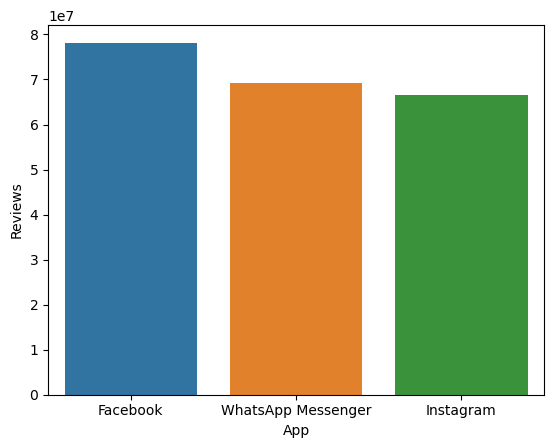

In [112]:
sns.barplot(x='App',y='Reviews',data=data[data['Type']=='Free'].sort_values(by='Reviews',ascending=False).head(5))

### **3.10.1 Top 5 highest reviewed paid apps**

In [113]:
data[data['Type']=='Paid'].sort_values(by='Reviews',ascending=False).head(5)

,App,Category,Rating,Reviews,Size(bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Mbs),Installs_category
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,NaN,Very High
4347,Minecraft,FAMILY,4.5,2375336,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,NaN,Very High
4034,Hitman Sniper,GAME,4.6,408292,30408704.0,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,29.0,Very High
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,27262976.0,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,26.0,High
8860,Bloons TD 5,FAMILY,4.6,190086,98566144.0,1000000,Paid,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,94.0,High


d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='App', ylabel='Reviews'>

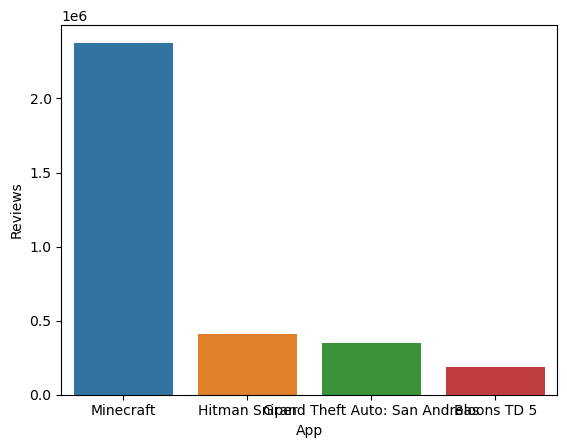

In [115]:
sns.barplot(x='App',y='Reviews',data=data[data['Type']=='Paid'].sort_values(by='Reviews',ascending=False).head(5))

---
### **3.10.2 Size vs Installs**

In [88]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(bytes)', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size(Mbs)', 'Installs_category'],
      dtype='object')

In [92]:
data.groupby('Installs')['Size(Mbs)'].value_counts().sort_values(ascending=False).head(10)

Installs  Size(Mbs)
1000000   19.0         34
          10.0         27
1000      12.0         27
1000000   14.0         26
          21.0         25
          17.0         25
100       15.0         24
1000000   18.0         23
10000000  25.0         23
10000     11.0         23
Name: count, dtype: int64

d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\downoads\miniconda\envs\ML_ENV\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Installs_category', ylabel='Size(Mbs)'>

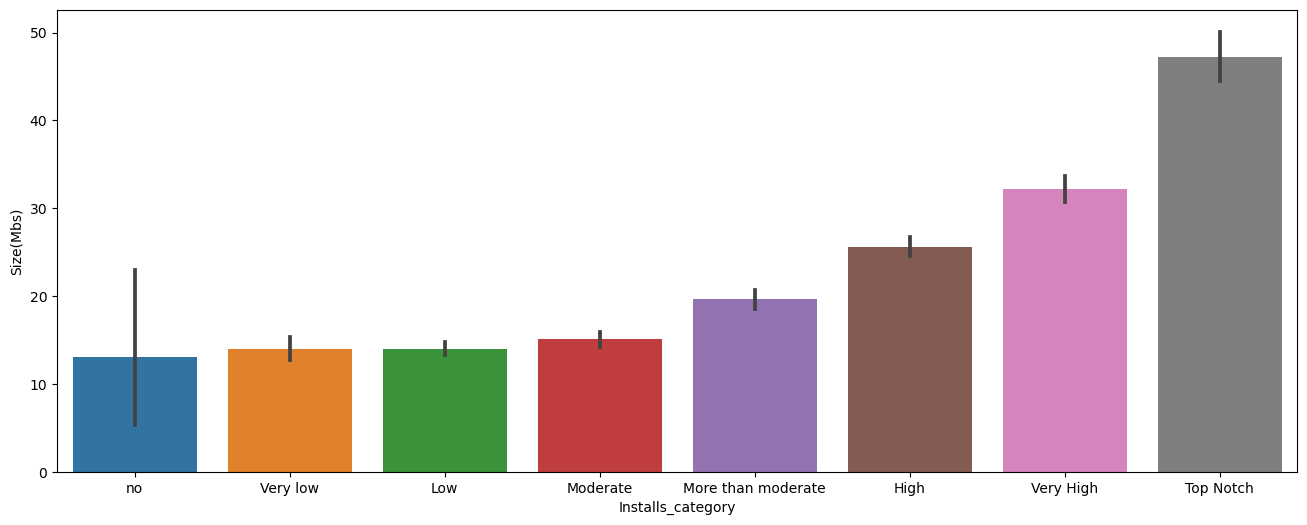

In [95]:
# lets plot it
plt.figure(figsize=(16,6))
sns.barplot(x='Installs_category',y='Size(Mbs)',data=data)

- Top Notch apps are greater in the size

## **Genres**
---


## **3.10.3 Which `Genre` has highest number of APPs?**

In [130]:
data.groupby('Genres')['App'].count().head(5)

Genres
Action                          356
Action;Action & Adventure        15
Adventure                        75
Adventure;Action & Adventure     13
Adventure;Brain Games             1
Name: App, dtype: int64

<Axes: ylabel='Genres'>

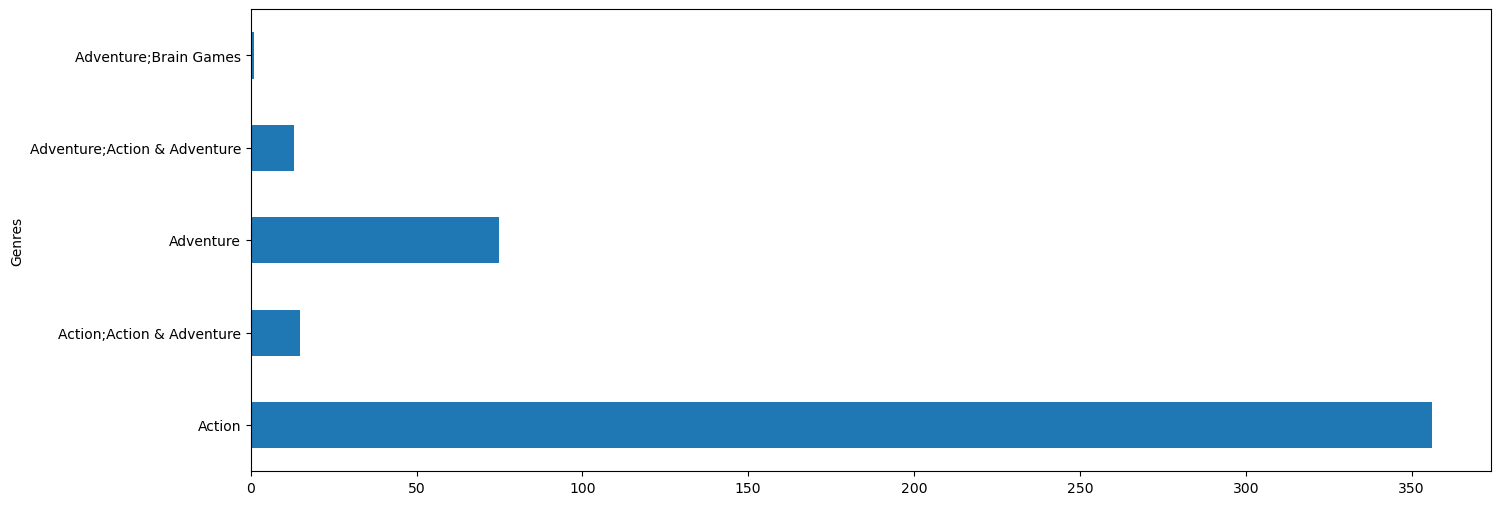

In [133]:
# plot the count of the apps
from matplotlib.pyplot import barh

plt.figure(figsize=(16,6))
data.groupby('Genres')['App'].count().head(5).plot(kind='barh')


<Axes: ylabel='App'>

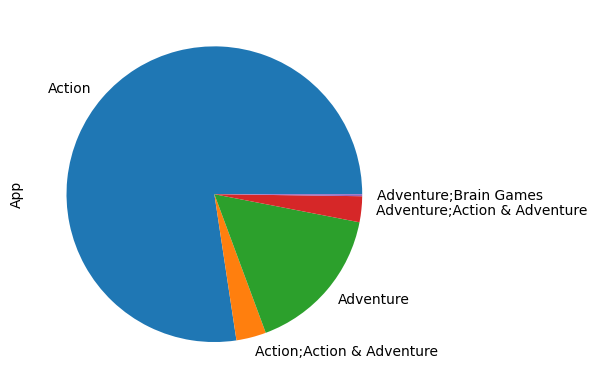

In [136]:
data.groupby('Genres')['App'].count().head(5).plot(kind='pie')


---


## **3.10.4 Genre  with greatest Installs**

In [138]:
data.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(5)

Genres
Communication    24152276251
Social           12513867902
Productivity     12463091369
Tools            11442271905
Photography       9721247655
Name: Installs, dtype: int64

<Axes: ylabel='Genres'>

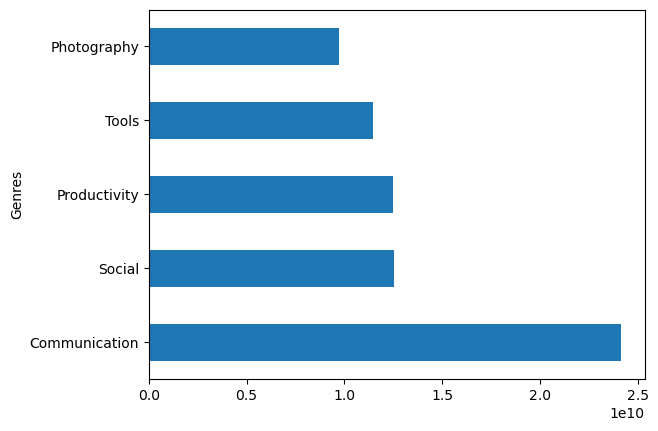

In [141]:
# bar plot
data.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(5).plot(kind='barh')

<Axes: ylabel='Installs'>

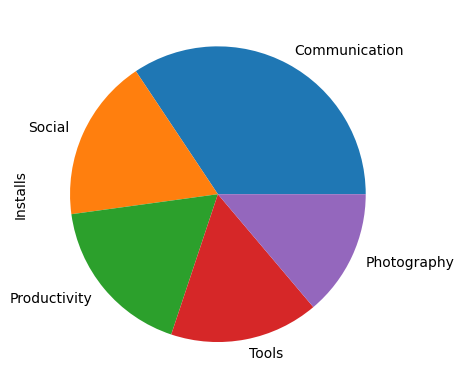

In [142]:
# pie plot
data.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(5).plot(kind='pie')

---


## **3.10.5 Genre with average ratings**

In [144]:
# genre with average ratings
data.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(5)

Genres
Comics;Creativity              4.8
Board;Pretend Play             4.8
Health & Fitness;Education     4.7
Adventure;Brain Games          4.6
Strategy;Action & Adventure    4.6
Name: Rating, dtype: float64

<Axes: ylabel='Genres'>

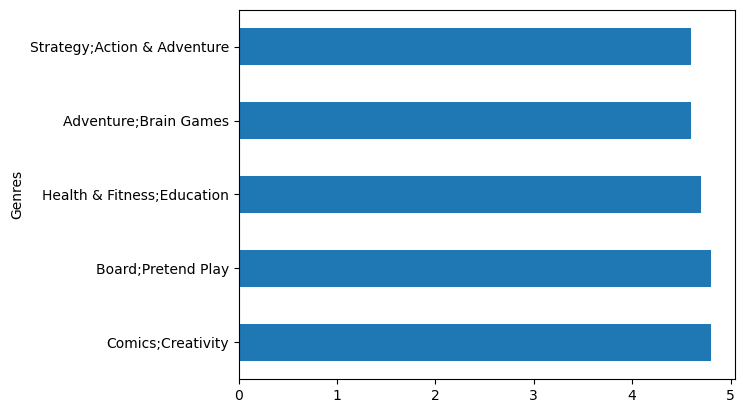

In [146]:
data.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(5).plot(kind='barh')

---


## **3.10.6. Conclusion:**

- The `Family` and `Gaming` categories have the highest number of apps.
- The “`Game`” and “`Communication`” categories have the greatest number of installations and reviews.
- The “`Art and Design`” and “`Game`” categories have the greatest number of ratings.
- The “`Events`” and “`Education`” categories have apps that are ``averagely rated``.
- Apps available to `everyone+10` have the greatest number of `installations`.
- Free apps have greater installations as compared to paid ones.
- Top-notch apps are greater in size.
- The “`Actions`” genre has the greatest number of apps.
- The “`Communications`” and “`Socials`” genres have the greatest number of installations.
- The “`Comics: Creativity`” genre has average ratings.
---